<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Scénario" data-toc-modified-id="Scénario-1">Scénario</a></span></li><li><span><a href="#Mission" data-toc-modified-id="Mission-2">Mission</a></span></li><li><span><a href="#Partie-2:-Analyses" data-toc-modified-id="Partie-2:-Analyses-3">Partie 2: Analyses</a></span><ul class="toc-item"><li><span><a href="#Répartition-des-pays" data-toc-modified-id="Répartition-des-pays-3.1">Répartition des pays</a></span><ul class="toc-item"><li><span><a href="#les-pays-exportateurs-de-viandes-de-volailles" data-toc-modified-id="les-pays-exportateurs-de-viandes-de-volailles-3.1.1">les pays exportateurs de viandes de volailles</a></span></li><li><span><a href="#Les-pays-importateurs-de-viandes-de-volailles" data-toc-modified-id="Les-pays-importateurs-de-viandes-de-volailles-3.1.2">Les pays importateurs de viandes de volailles</a></span></li><li><span><a href="#Les-pays-producteurs-de-viandes-de-volailles" data-toc-modified-id="Les-pays-producteurs-de-viandes-de-volailles-3.1.3">Les pays producteurs de viandes de volailles</a></span></li><li><span><a href="#Les-pays-consommateurs-de-viandes-de-volailles" data-toc-modified-id="Les-pays-consommateurs-de-viandes-de-volailles-3.1.4">Les pays consommateurs de viandes de volailles</a></span></li></ul></li><li><span><a href="#Corrélation-entre-features" data-toc-modified-id="Corrélation-entre-features-3.2">Corrélation entre features</a></span></li><li><span><a href="#Classification-ascendante-hiérarchique" data-toc-modified-id="Classification-ascendante-hiérarchique-3.3">Classification ascendante hiérarchique</a></span><ul class="toc-item"><li><span><a href="#Réaliser-un-clustering-hiérarchique" data-toc-modified-id="Réaliser-un-clustering-hiérarchique-3.3.1">Réaliser un clustering hiérarchique</a></span></li><li><span><a href="#Centroides" data-toc-modified-id="Centroides-3.3.2">Centroides</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-3.3.3">Heatmap</a></span></li><li><span><a href="#Visualisation-cluster" data-toc-modified-id="Visualisation-cluster-3.3.4">Visualisation cluster</a></span></li></ul></li><li><span><a href="#Algorithme-du-K-means" data-toc-modified-id="Algorithme-du-K-means-3.4">Algorithme du K-means</a></span><ul class="toc-item"><li><span><a href="#K-value" data-toc-modified-id="K-value-3.4.1">K value</a></span></li><li><span><a href="#Centroides" data-toc-modified-id="Centroides-3.4.2">Centroides</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-3.4.3">Heatmap</a></span></li><li><span><a href="#Visualisation-cluster" data-toc-modified-id="Visualisation-cluster-3.4.4">Visualisation cluster</a></span></li></ul></li><li><span><a href="#Analyse-en-Composante-Principale-(ACP)" data-toc-modified-id="Analyse-en-Composante-Principale-(ACP)-3.5">Analyse en Composante Principale (ACP)</a></span><ul class="toc-item"><li><span><a href="#Diagramme-éboulis-des-valeurs-propres" data-toc-modified-id="Diagramme-éboulis-des-valeurs-propres-3.5.1">Diagramme éboulis des valeurs propres</a></span></li></ul></li></ul></li></ul></div>

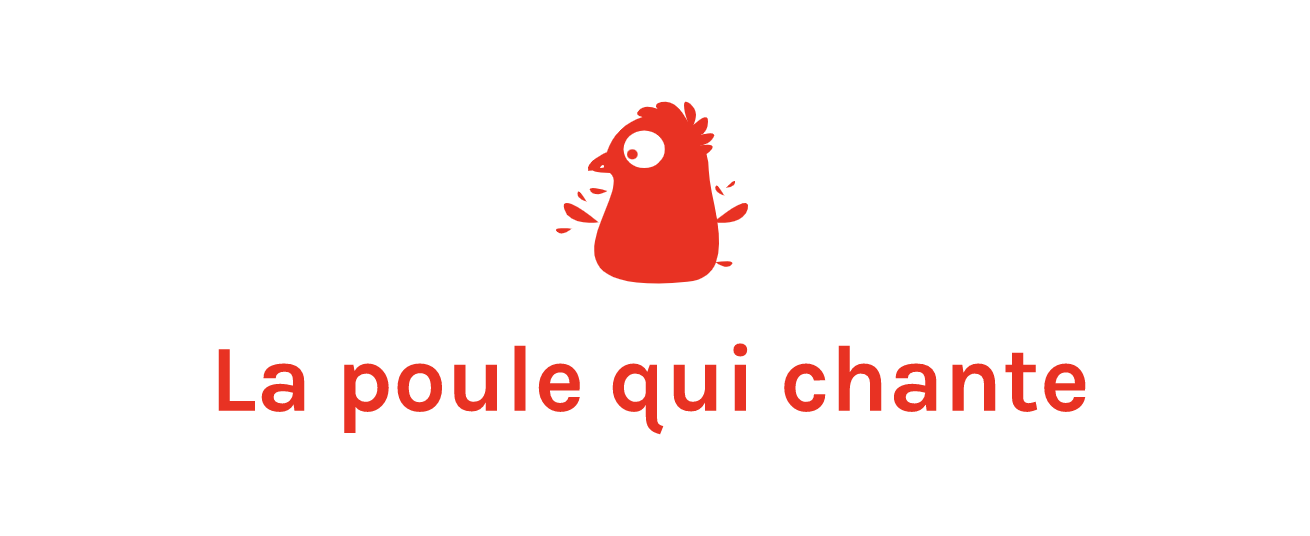

In [1]:
!pip install pca

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import numpy as np
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pca
from pca import pca
from sklearn import preprocessing, cluster, metrics, decomposition
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
import matplotlib.image as mpimg
%matplotlib inline
import warnings

# Scénario
Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Elle souhaite se développer à l'international.

# Mission
Pars des données de la FAO (Food and Agriculture Organization) que je te mets en pièce jointe pour faire ton analyse. Si tu veux aller plus loin, notamment avec les critères de l’analyse PESTEL, tu peux récupérer et utiliser toutes les données en open data que tu souhaites sur le site de la FAO.

Pour la partie analyse, dans un premier temps j’aimerais que tu testes la classification ascendante hiérarchique, avec un dendrogramme comme visualisation. Ensuite tu pourras utiliser la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering. N'hésite pas à prendre le temps d’analyser les centroïdes de tes classes. Tu peux également réaliser une ACP afin de visualiser les résultats de ton analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus...

In [3]:
#import du fichier 
df_all_items= pd.read_csv("data_export_volailles.csv")

In [4]:
df_all_items=df_all_items.drop("Unnamed: 0",axis=1)

# Partie 2: Analyses

## Répartition des pays

### les pays exportateurs de viandes de volailles

In [5]:
# les plus gros exportateurs de viandes de volailles
df_all_items.sort_values(by='Export viandes Volailles',ascending=False, inplace=True)
df_all_items.head(10)

Code ISO        Zone  Population 2017  \
23       BRA      Brésil     2.078338e+08   
51       USA  États-Unis     3.250848e+08   
120      NLD    Pays-Bas     1.702135e+07   
123      POL     Pologne     3.795318e+07   
147      THA   Thaïlande     6.920981e+07   
67       HKG   Hong Kong     7.306322e+06   
17       BEL    Belgique     1.141975e+07   
4        DEU   Allemagne     8.265841e+07   
32       CHN       Chine     1.421022e+09   
153      TUR     Turquie     8.111645e+07   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
23                                  18.90                      -0.42   
51                                  15.40                       0.34   
120                                  6.88                       0.92   
123                                 -1.57                       0.52   
147                                  9.94                      -0.75   
67                                  10.60                       0.83   
17                                  11.07                       0.43   
4                                    1.54                       0.59   
32                                  10.11                       0.00   
153                                 28.27                      -1.79   

     PIB par habitant  Export viandes Volailles  \
23            14524.6                    4223.0   
51            60109.7                    3692.0   
120           55088.6                    1418.0   
123           30064.5                    1025.0   
147           17423.0                     796.0   
67            59849.2                     663.0   
17            50442.3                     656.0   
4             52952.9                     646.0   
32            14621.2                     576.0   
153           27913.8                     429.0   

     % Export viandes vs total aliments  \
23                                 4.70   
51                                 3.66   
120                                5.82   
123                                9.85   
147                                1.28   
67                                23.14   
17                                 5.41   
4                                  6.17   
32                                 2.22   
153                                2.42   

     % Export viandes Volailles vs total aliments  \
23                                           2.74   
51                                           1.78   
120                                          2.41   
123                                          4.30   
147                                          1.18   
67                                          18.37   
17                                           2.02   
4                                            1.10   
32                                           1.43   
153                                          2.32   

     % Export viandes Volailles vs total viandes  ...  \
23                                         58.43  ...   
51                                         48.68  ...   
120                                        41.37  ...   
123                                        43.71  ...   
147                                        92.34  ...   
67                                         79.40  ...   
17                                         37.38  ...   
4                                          17.81  ...   
32                                         64.43  ...   
153                                        95.97  ...   

     % Import viandes Volailles vs total viandes  Conso Viandes Volailles  \
23                                          4.48                   9982.0   
51                                          5.26                  18100.0   
120                                        35.72                    346.0   
123                                         6.56                   1150.0   
147                                         9.52                    896.0   
67   

In [6]:
fig = px.choropleth(df_all_items, locations='Code ISO', color='Export viandes Volailles', color_continuous_scale= 'sunsetdark', labels={'Proportion': '%'})
fig.update_layout(
    title_text = 'Les pays exportateurs de viandes de volailles 2017', title_x = 0.5,
    font = dict(size=10))
fig.show()

### Les pays importateurs de viandes de volailles

In [7]:
# les plus gros importateurs de viandes de volailles
df_all_items.sort_values(by='Import viandes Volailles',ascending=False, inplace=True)
df_all_items.head(10)

Code ISO             Zone  Population 2017  \
78       JPN            Japon     1.275027e+08   
103      MEX          Mexique     1.247773e+08   
67       HKG        Hong Kong     7.306322e+06   
4        DEU        Allemagne     8.265841e+07   
126      GBR      Royaume-Uni     6.672746e+07   
7        SAU  Arabie saoudite     3.310118e+07   
120      NLD         Pays-Bas     1.702135e+07   
1        ZAF   Afrique du Sud     5.700976e+07   
72       IRQ             Irak     3.755278e+07   
32       CHN            Chine     1.421022e+09   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
78                                  -0.02                       1.11   
103                                 26.17                      -0.72   
67                                  10.60                       0.83   
4                                    1.54                       0.59   
126                                 13.24                       0.33   
7                                   60.19                      -0.58   
120                                  6.88                       0.92   
1                                   26.78                      -0.28   
72                                  59.82                      -2.31   
32                                  10.11                       0.00   

     PIB par habitant  Export viandes Volailles  \
78            40966.6                      10.0   
103           19721.3                       9.0   
67            59849.2                     663.0   
4             52952.9                     646.0   
126           45744.7                     359.0   
7             47306.2                      10.0   
120           55088.6                    1418.0   
1             12701.3                      63.0   
72            10719.0                       0.0   
32            14621.2                     576.0   

     % Export viandes vs total aliments  \
78                                 1.12   
103                                1.64   
67                                23.14   
4                                  6.17   
126                                5.94   
7                                  0.80   
120                                5.82   
1                                  1.35   
72                                 0.00   
32                                 2.22   

     % Export viandes Volailles vs total aliments  \
78                                           0.59   
103                                          0.04   
67                                          18.37   
4                                            1.10   
126                                          2.45   
7                                            0.45   
120                                          2.41   
1                                            0.57   
72                                           0.00   
32                                           1.43   

     % Export viandes Volailles vs total viandes  ...  \
78                                         52.63  ...   
103                                         2.17  ...   
67                                         79.40  ...   
4                                          17.81  ...   
126                                        41.22  ...   
7                                          55.56  ...   
120                                        41.37  ...   
1                                          42.57  ...   
72                                          0.00  ...   
32                                         64.43  ...   

     % Import viandes Volailles vs total viandes  Conso Viandes Volailles  \
78                                         32.00                   2359.0   
103                                        47.76                   4058.0   
67                                         48.45                    391.0   
4                                          31.52                   1609.0   
126                        

In [8]:
fig = px.choropleth(df_all_items, locations='Code ISO', color='Import viandes Volailles', color_continuous_scale= 'sunsetdark', labels={'Proportion': '%'})
fig.update_layout(
    title_text = 'Les pays importateurs de viandes de volailles 2017', title_x = 0.5,
    font = dict(size=10))
fig.show()

### Les pays producteurs de viandes de volailles

In [9]:
# les plus gros producteurs de viandes de volailles
df_all_items.sort_values(by='Production viandes Volailles',ascending=False, inplace=True)
df_all_items.head(10)

Code ISO        Zone  Population 2017  \
51       USA  États-Unis     3.250848e+08   
32       CHN       Chine     1.421022e+09   
23       BRA      Brésil     2.078338e+08   
127      RUS      Russie     1.455301e+08   
69       IND        Inde     1.338677e+09   
103      MEX     Mexique     1.247773e+08   
123      POL     Pologne     3.795318e+07   
70       IDN   Indonésie     2.646510e+08   
78       JPN       Japon     1.275027e+08   
153      TUR     Turquie     8.111645e+07   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
51                                  15.40                       0.34   
32                                  10.11                       0.00   
23                                  18.90                      -0.42   
127                                 -0.60                      -0.64   
69                                  26.70                      -0.76   
103                                 26.17                      -0.72   
123                                 -1.57                       0.52   
70                                  25.12                      -0.50   
78                                  -0.02                       1.11   
153                                 28.27                      -1.79   

     PIB par habitant  Export viandes Volailles  \
51            60109.7                    3692.0   
32            14621.2                     576.0   
23            14524.6                    4223.0   
127           25926.4                     115.0   
69             6182.9                       4.0   
103           19721.3                       9.0   
123           30064.5                    1025.0   
70            10935.6                       0.0   
78            40966.6                      10.0   
153           27913.8                     429.0   

     % Export viandes vs total aliments  \
51                                 3.66   
32                                 2.22   
23                                 4.70   
127                                0.37   
69                                 3.85   
103                                1.64   
123                                9.85   
70                                 0.01   
78                                 1.12   
153                                2.42   

     % Export viandes Volailles vs total aliments  \
51                                           1.78   
32                                           1.43   
23                                           2.74   
127                                          0.20   
69                                           0.01   
103                                          0.04   
123                                          4.30   
70                                           0.00   
78                                           0.59   
153                                          2.32   

     % Export viandes Volailles vs total viandes  ...  \
51                                         48.68  ...   
32                                         64.43  ...   
23                                         58.43  ...   
127                                        54.50  ...   
69                                          0.30  ...   
103                                         2.17  ...   
123                                        43.71  ...   
70                                          0.00  ...   
78                                         52.63  ...   
153                                        95.97  ...   

     % Import viandes Volailles vs total viandes  Conso Viandes Volailles  \
51                                          5.26                  18100.0   
32                                         14.63                  17518.0   
23                                          4.48                   9982.0   
127                                        21.54                   4509.0   
69                                          0.00                   2965.0   
103  

In [10]:
fig = px.choropleth(df_all_items, locations='Code ISO', color='Production viandes Volailles', color_continuous_scale= 'sunsetdark', labels={'Proportion': '%'})
fig.update_layout(
    title_text = 'Les pays producteurs de viandes de volailles 2017', title_x = 0.5,
    font = dict(size=10))
fig.show()

### Les pays consommateurs de viandes de volailles

In [11]:
# les plus gros consommateurs de viandes de volailles
df_all_items.sort_values(by='Conso Viandes Volailles',ascending=False, inplace=True)
df_all_items.head(10)

Code ISO            Zone  Population 2017  \
51       USA      États-Unis     3.250848e+08   
32       CHN           Chine     1.421022e+09   
23       BRA          Brésil     2.078338e+08   
127      RUS          Russie     1.455301e+08   
103      MEX         Mexique     1.247773e+08   
69       IND            Inde     1.338677e+09   
78       JPN           Japon     1.275027e+08   
71       IRN            Iran     8.067388e+07   
126      GBR     Royaume-Uni     6.672746e+07   
1        ZAF  Afrique du Sud     5.700976e+07   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
51                                  15.40                       0.34   
32                                  10.11                       0.00   
23                                  18.90                      -0.42   
127                                 -0.60                      -0.64   
103                                 26.17                      -0.72   
69                                  26.70                      -0.76   
78                                  -0.02                       1.11   
71                                  22.93                      -0.93   
126                                 13.24                       0.33   
1                                   26.78                      -0.28   

     PIB par habitant  Export viandes Volailles  \
51            60109.7                    3692.0   
32            14621.2                     576.0   
23            14524.6                    4223.0   
127           25926.4                     115.0   
103           19721.3                       9.0   
69             6182.9                       4.0   
78            40966.6                      10.0   
71            14535.9                      45.0   
126           45744.7                     359.0   
1             12701.3                      63.0   

     % Export viandes vs total aliments  \
51                                 3.66   
32                                 2.22   
23                                 4.70   
127                                0.37   
103                                1.64   
69                                 3.85   
78                                 1.12   
71                                 0.67   
126                                5.94   
1                                  1.35   

     % Export viandes Volailles vs total aliments  \
51                                           1.78   
32                                           1.43   
23                                           2.74   
127                                          0.20   
103                                          0.04   
69                                           0.01   
78                                           0.59   
71                                           0.63   
126                                          2.45   
1                                            0.57   

     % Export viandes Volailles vs total viandes  ...  \
51                                         48.68  ...   
32                                         64.43  ...   
23                                         58.43  ...   
127                                        54.50  ...   
103                                         2.17  ...   
69                                          0.30  ...   
78                                         52.63  ...   
71                                         93.75  ...   
126                                        41.22  ...   
1                                          42.57  ...   

     % Import viandes Volailles vs total viandes  Conso Viandes Volailles  \
51                                          5.26                  18100.0   
32                                         14.63                  17518.0   
23                                          4.48                   9982.0   
127                                        21.54                   4509.0   
103                                   

In [12]:
fig = px.choropleth(df_all_items, locations='Code ISO', color='Conso Viandes Volailles', color_continuous_scale= 'sunsetdark', labels={'Proportion': '%'})
fig.update_layout(
    title_text = 'Les pays consommateurs de viandes de volailles 2017', title_x = 0.5,
    font = dict(size=10))
fig.show()

## Corrélation entre features

<ipython-input-13-2e1e99979d91>:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



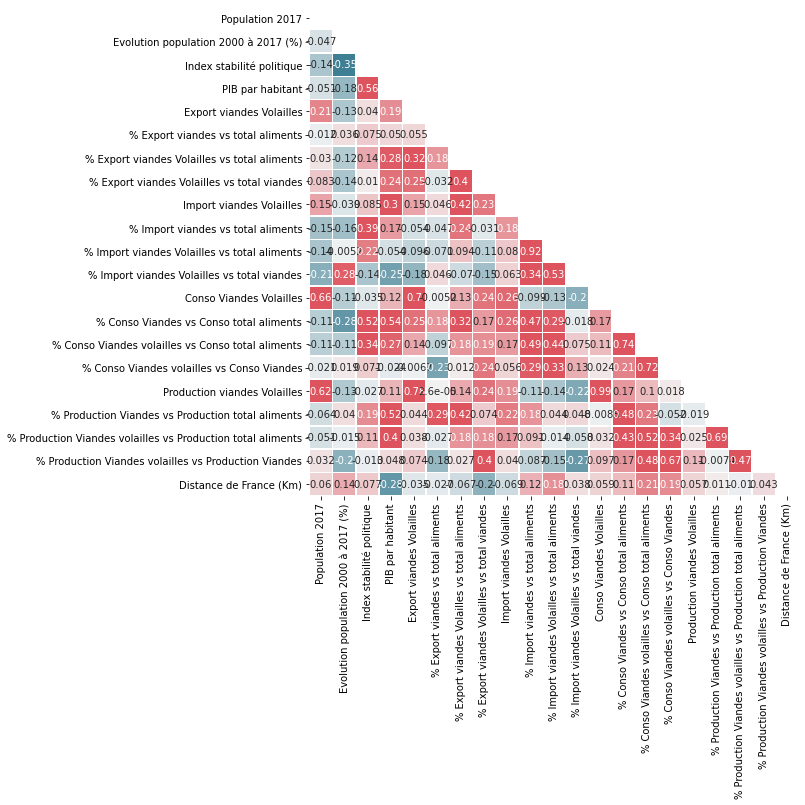

In [13]:
# Compute the correlation matrix
corr = df_all_items.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
fig = sns.heatmap(corr,annot = True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar=None)

In [14]:
df= df_all_items[['Zone','Distance de France (Km)',
       'Evolution population 2000 à 2017 (%)', 'Index stabilité politique',
       'PIB par habitant','% Import viandes Volailles vs total aliments',
       '% Conso Viandes volailles vs Conso total aliments',
       '% Conso Viandes volailles vs Conso Viandes']]

<ipython-input-15-417102eb6e9d>:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



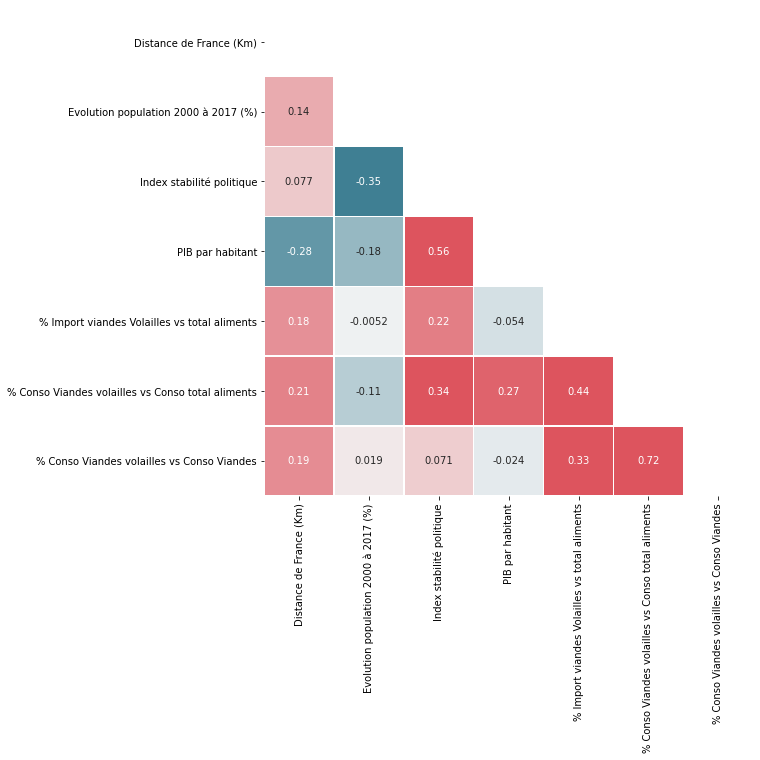

In [15]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
fig = sns.heatmap(corr,annot = True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar=None)

## Classification ascendante hiérarchique

In [16]:
df = df.set_index('Zone')
df_cah = df
df_cah

Distance de France (Km)  \
Zone                                            
États-Unis                             6166.0   
Chine                                  8216.0   
Brésil                                 8602.0   
Russie                                 2486.0   
Mexique                                9086.0   
...                                       ...   
Dominique                              6822.0   
Kiribati                              14362.0   
Sao Tomé-et-Principe                   5340.0   
Laos                                   9237.0   
Ouzbékistan                            5147.0   

                      Evolution population 2000 à 2017 (%)  \
Zone                                                         
États-Unis                                           15.40   
Chine                                                10.11   
Brésil                                               18.90   
Russie                                               -0.60   
Mexique                                              26.17   
...                                                    ...   
Dominique                                             2.60   
Kiribati                                             35.26   
Sao Tomé-et-Principe                                 45.57   
Laos                                                 30.61   
Ouzbékistan                                          29.03   

                      Index stabilité politique  PIB par habitant  \
Zone                                                                
États-Unis                                 0.34           60109.7   
Chine                                      0.00           14621.2   
Brésil                                    -0.42           14524.6   
Russie                                    -0.64           25926.4   
Mexique                                   -0.72           19721.3   
...                                         ...               ...   
Dominique                                  1.20           11304.0   
Kiribati                                   0.88            2235.7   
Sao Tomé-et-Principe                       0.19            3952.9   
Laos                                       0.40            7257.8   
Ouzbékistan                               -0.24            6518.8   

                      % Import viandes Volailles vs total aliments  \
Zone                                                                 
États-Unis                                                    0.15   
Chine                                                         0.22   
Brésil                                                        0.02   
Russie                                                        0.94   
Mexique                                                       2.18   
...                                                            ...   
Dominique                                                    15.38   
Kiribati                                                      3.45   
Sao Tomé-et-Principe                                          4.65   
Laos                                                          0.00   
Ouzbékistan                                                   0.00   

                      % Conso Viandes volailles vs Conso total aliments  \
Zone                                                                      
États-Unis                                                         5.62   
Chine                                                              1.27   
Brésil                                                             6.23   
Russie                                                             3.49   
Mexique                                                            4.37   
...                                                                 ...   
Dominique                                                          4.35   
Kiribati                                                           2.86   
Sao Tomé-et-Princi

In [17]:
# Données
X = df_cah.select_dtypes('number') 

In [18]:
# Etiquettes des échantillons
y = df_cah.index

In [19]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
#clustering hierarchique
Z=linkage(X_scaled,'ward')

### Réaliser un clustering hiérarchique

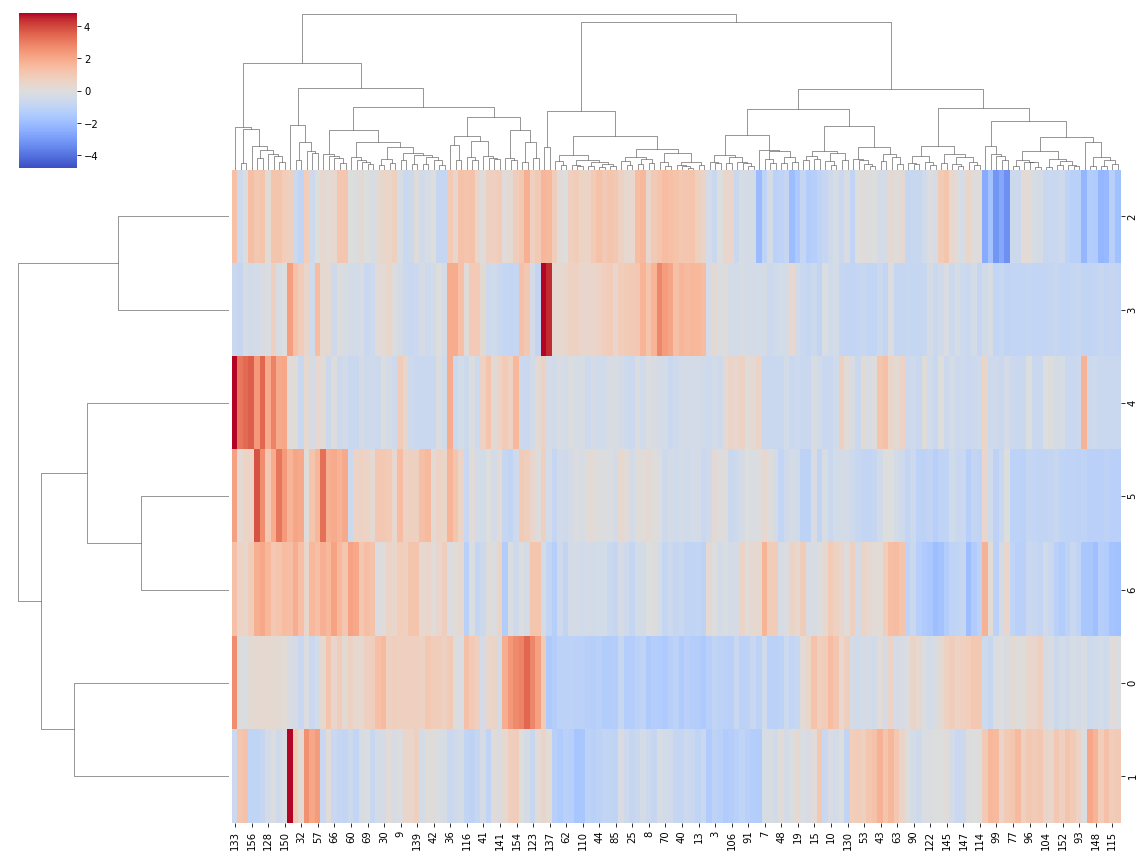

In [21]:
metric = 'euclidean'
method = 'ward'
cmap = 'coolwarm'

clustergrid = sns.clustermap(X_scaled.T, figsize=(16, 12), metric=metric, method=method, cmap=cmap, 
                             row_cluster=True, col_cluster=True,
                             center=0.0, vmin=-4.8, vmax=4.8)

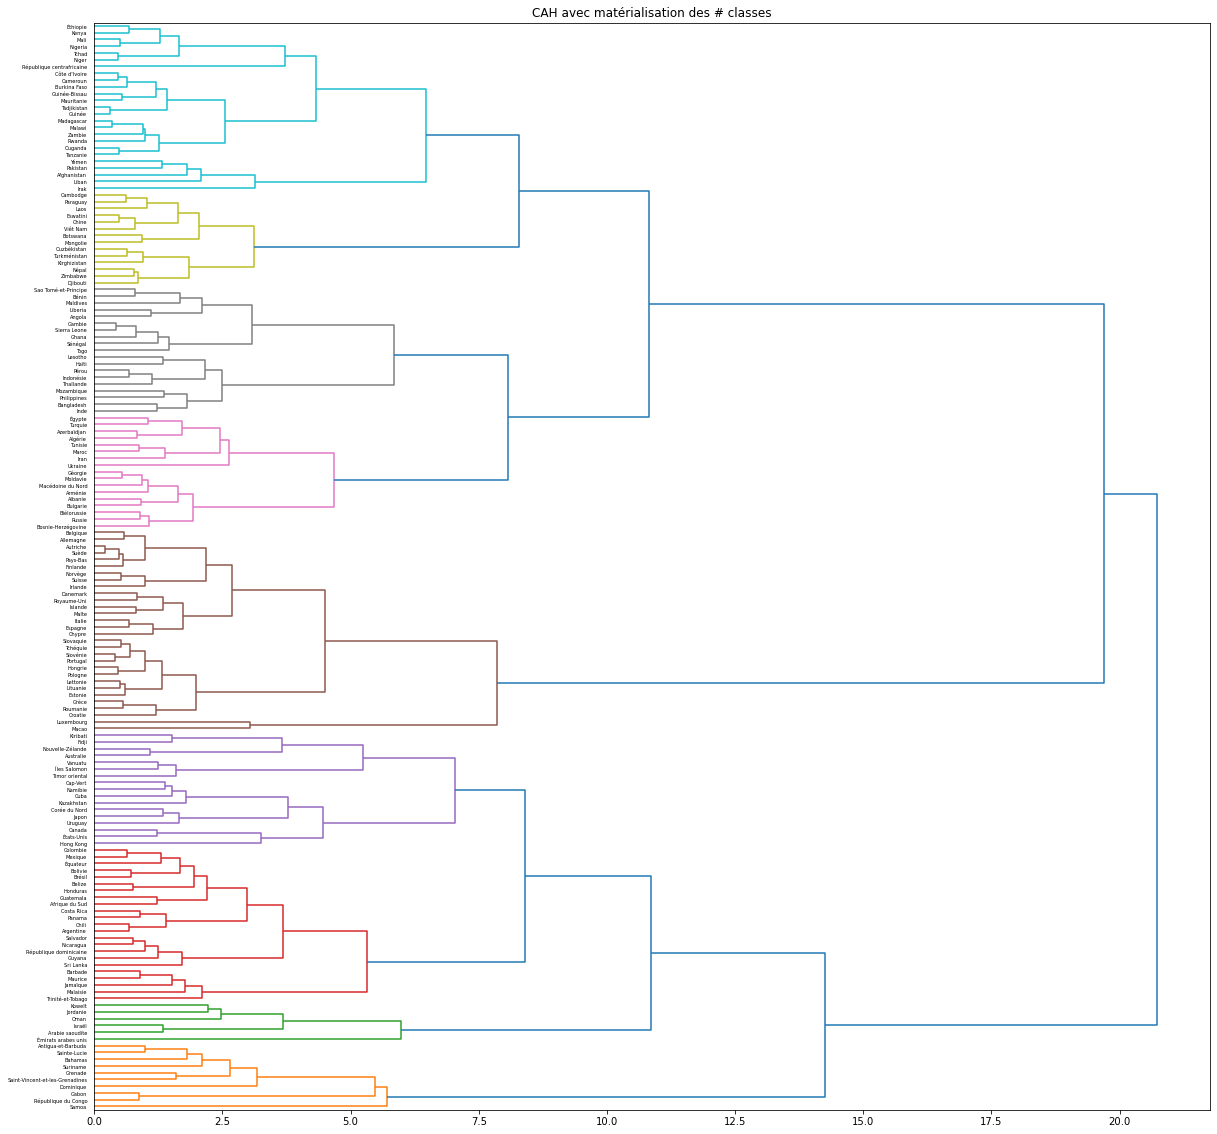

In [22]:
# Création d'un dendrogramme avec les clusters en couleurs et création d'un DF contenant le numéro du groupe 

Z=linkage(X_scaled ,method='ward',metric='euclidean')
fig=plt.figure(figsize=(20,20)) 
plt.title('CAH avec matérialisation des # classes')
dendrogram(Z,labels=df_cah.index,orientation='right',color_threshold=8)

plt.savefig('cah.png')
plt.show()

 # découpage à la hauteur t = n ==> identifiants de n groupes obtenus
groupes_cah = fcluster(Z,t=7.5,criterion='distance')


In [23]:
df_cah["CAH"] = groupes_cah
df_cah.head()

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
Zone                                                                        
États-Unis                   6166.0                                 15.40   
Chine                        8216.0                                 10.11   
Brésil                       8602.0                                 18.90   
Russie                       2486.0                                 -0.60   
Mexique                      9086.0                                 26.17   

            Index stabilité politique  PIB par habitant  \
Zone                                                      
États-Unis                       0.34           60109.7   
Chine                            0.00           14621.2   
Brésil                          -0.42           14524.6   
Russie                          -0.64           25926.4   
Mexique                         -0.72           19721.3   

            % Import viandes Volailles vs total aliments  \
Zone                                                       
États-Unis                                          0.15   
Chine                                               0.22   
Brésil                                              0.02   
Russie                                              0.94   
Mexique                                             2.18   

            % Conso Viandes volailles vs Conso total aliments  \
Zone                                                            
États-Unis                                               5.62   
Chine                                                    1.27   
Brésil                                                   6.23   
Russie                                                   3.49   
Mexique                                                  4.37   

            % Conso Viandes volailles vs Conso Viandes  CAH  
Zone                                                         
États-Unis                                       44.86    4  
Chine                                            20.58    9  
Brésil                                           48.11    3  
Russie                                           40.44    7  
Mexique                                          50.14    3

In [24]:
#sns.pairplot(df_CAH, kind="scatter", hue = 'CAH', palette = "Paired")

### Centroides

In [25]:
# les moyennes des groupes CAH par feature
df_cah_gb = df_cah.groupby(["CAH"]).mean()
df_cah_gb

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
CAH                                                                  
1                7647.200000                             24.603000   
2                4435.166667                             99.441667   
3                8852.173913                             23.543478   
4               11019.882353                             22.572353   
5                4952.500000                             40.635000   
6                1299.321429                              5.142143   
7                2401.411765                              7.675294   
8                7073.631579                             45.473158   
9                7641.500000                             24.632857   
10               5326.920000                             60.188800   

     Index stabilité politique  PIB par habitant  \
CAH                                                
1                     0.651000      15486.420000   
2                    -0.108333      40543.400000   
3                     0.011739      15508.295652   
4                     0.694706      25808.976471   
5                     1.380000     119246.000000   
6                     0.757500      43548.735714   
7                    -0.644706      14955.070588   
8                    -0.405263       6003.163158   
9                    -0.044286       8573.021429   
10                   -1.217600       3506.560000   

     % Import viandes Volailles vs total aliments  \
CAH                                                 
1                                       13.599000   
2                                        2.415000   
3                                        1.176957   
4                                        3.306471   
5                                        2.995000   
6                                        1.170714   
7                                        1.816471   
8                                        2.469474   
9                                        0.675000   
10                                       1.050400   

     % Conso Viandes volailles vs Conso total aliments  \
CAH                                                      
1                                             7.342000   
2                                             6.336667   
3                                             5.335652   
4                                             3.141176   
5                                             3.280000   
6                                             2.399286   
7                                             2.302353   
8                                             1.574211   
9                                             0.722143   
10                                            0.782000   

     % Conso Viandes volailles vs Conso Viandes  
CAH                                              
1                                     67.210000  
2                                     68.803333  
3                                     62.192174  
4                                     38.644118  
5                                     28.125000  
6                                     28.579286  
7                                     46.642353  
8                                     51.363158  
9                                     13.451429  
10                                    22.196400

In [26]:
#les pays par groupe cah
for i in range(0,11):
    print("Groupe {}:".format(i))
    print(", ".join(df_cah[df_cah['CAH']==i].index.get_level_values('Zone').sort_values()))

Groupe 0:

Groupe 1:
Antigua-et-Barbuda, Bahamas, Dominique, Gabon, Grenade, République du Congo, Saint-Vincent-et-les-Grenadines, Sainte-Lucie, Samoa, Suriname
Groupe 2:
Arabie saoudite, Israël, Jordanie, Koweït, Oman, Émirats arabes unis
Groupe 3:
Afrique du Sud, Argentine, Barbade, Belize, Bolivie, Brésil, Chili, Colombie, Costa Rica, Guatemala, Guyana, Honduras, Jamaïque, Malaisie, Maurice, Mexique, Nicaragua, Panama, République dominicaine, Salvador, Sri Lanka, Trinité-et-Tobago, Équateur
Groupe 4:
Australie, Canada, Cap-Vert, Corée du Nord, Cuba, Fidji, Hong Kong, Japon, Kazakhstan, Kiribati, Namibie, Nouvelle-Zélande, Timor oriental, Uruguay, Vanuatu, États-Unis, Îles Salomon
Groupe 5:
Luxembourg, Macao
Groupe 6:
Allemagne, Autriche, Belgique, Chypre, Croatie, Danemark, Espagne, Estonie, Finlande, Grèce, Hongrie, Irlande, Islande, Italie, Lettonie, Lituanie, Malte, Norvège, Pays-Bas, Pologne, Portugal, Roumanie, Royaume-Uni, Slovaquie, Slovénie, Suisse, Suède, Tchéquie
Groupe 7:

### Visualisation cluster

In [27]:
df_iso_pays=df_all_items[['Zone','Code ISO']]

In [28]:
df_cah_iso = pd.merge(df_iso_pays, df_cah, on="Zone")

In [29]:
df_cah_iso = df_cah_iso.sort_values(by='CAH', ascending=True)

In [30]:
df_cah_iso['CAH'] = df_cah_iso['CAH'].astype(object)

In [31]:
colors=["Maroon", "red", "salmon","yellow","Olive", "green","Lime", "orange", "blue", "orchid"]

fig = px.choropleth(
    df_cah_iso, 
    locations=df_cah_iso['Code ISO'], 
    color=df_cah_iso['CAH'],
    hover_name = df_cah_iso["Zone"],
    color_discrete_sequence=colors,
    labels={'CAH':'Clusters'})

fig.update_layout(
    title_text='Les Cluster avec CAH', title_x=0.5,
    font=dict(size=10))
fig.show()

### Heatmap

In [32]:
df_cah=df_cah.reset_index("Zone")
df_cah=df_cah.set_index('CAH')
df_cah=df_cah.drop(['Zone'],axis=1)
df_cah

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
CAH                                                                  
4                     6166.0                                 15.40   
9                     8216.0                                 10.11   
3                     8602.0                                 18.90   
7                     2486.0                                 -0.60   
3                     9086.0                                 26.17   
..                       ...                                   ...   
1                     6822.0                                  2.60   
4                    14362.0                                 35.26   
8                     5340.0                                 45.57   
9                     9237.0                                 30.61   
9                     5147.0                                 29.03   

     Index stabilité politique  PIB par habitant  \
CAH                                                
4                         0.34           60109.7   
9                         0.00           14621.2   
3                        -0.42           14524.6   
7                        -0.64           25926.4   
3                        -0.72           19721.3   
..                         ...               ...   
1                         1.20           11304.0   
4                         0.88            2235.7   
8                         0.19            3952.9   
9                         0.40            7257.8   
9                        -0.24            6518.8   

     % Import viandes Volailles vs total aliments  \
CAH                                                 
4                                            0.15   
9                                            0.22   
3                                            0.02   
7                                            0.94   
3                                            2.18   
..                                            ...   
1                                           15.38   
4                                            3.45   
8                                            4.65   
9                                            0.00   
9                                            0.00   

     % Conso Viandes volailles vs Conso total aliments  \
CAH                                                      
4                                                 5.62   
9                                                 1.27   
3                                                 6.23   
7                                                 3.49   
3                                                 4.37   
..                                                 ...   
1                                                 4.35   
4                                                 2.86   
8                                                 1.63   
9                                                 0.00   
9                                                 0.00   

     % Conso Viandes volailles vs Conso Viandes  
CAH                                              
4                                         44.86  
9                                         20.58  
3                                         48.11  
7                                         40.44  
3                                         50.14  
..                                          ...  
1                                         60.00  
4                                         66.67  
8                                         66.67  
9                                          0.00  
9                                          0.00  

[161 rows x 7 columns]

In [33]:
# Centrage et réduction des données
std_scale = preprocessing.StandardScaler().fit(df_cah)
df_scaled_cah = std_scale.transform(X)

In [34]:
#On crée un dataframe de nos données centrées réduites car on s'en servira pour afficher la heatmap des centroïds
df_cah_c_r = pd.DataFrame(df_scaled_cah, index=df_cah.index, columns=df_cah.columns)
df_cah_gb_c_r = df_cah_c_r.groupby(["CAH"]).mean()
df_cah_gb_c_r

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
CAH                                                                  
1                   0.452805                             -0.186102   
2                  -0.397102                              2.373287   
3                   0.771643                             -0.222337   
4                   1.345221                             -0.255548   
5                  -0.260215                              0.362172   
6                  -1.226851                             -0.851639   
7                  -0.935236                             -0.765009   
8                   0.301038                              0.527631   
9                   0.451297                             -0.185081   
10                 -0.161144                              1.030888   

     Index stabilité politique  PIB par habitant  \
CAH                                                
1                     0.783430         -0.219428   
2                    -0.067001          0.986426   
3                     0.067476         -0.218375   
4                     0.832379          0.277340   
5                     1.599888          4.773944   
6                     0.902706          1.131056   
7                    -0.667722         -0.244998   
8                    -0.399554         -0.675804   
9                     0.004730         -0.552131   
10                   -1.309347         -0.795952   

     % Import viandes Volailles vs total aliments  \
CAH                                                 
1                                        3.112166   
2                                        0.004789   
3                                       -0.339191   
4                                        0.252476   
5                                        0.165937   
6                                       -0.340925   
7                                       -0.161507   
8                                        0.019924   
9                                       -0.478655   
10                                      -0.374353   

     % Conso Viandes volailles vs Conso total aliments  \
CAH                                                      
1                                             1.888801   
2                                             1.465398   
3                                             1.043815   
4                                             0.119596   
5                                             0.178063   
6                                            -0.192856   
7                                            -0.233680   
8                                            -0.540342   
9                                            -0.899196   
10                                           -0.873986   

     % Conso Viandes volailles vs Conso Viandes  
CAH                                              
1                                      1.262329  
2                                      1.337988  
3                                      1.024058  
4                                     -0.094116  
5                                     -0.593615  
6                                     -0.572043  
7                                      0.285678  
8                                      0.509845  
9                                     -1.290386  
10                                    -0.875133

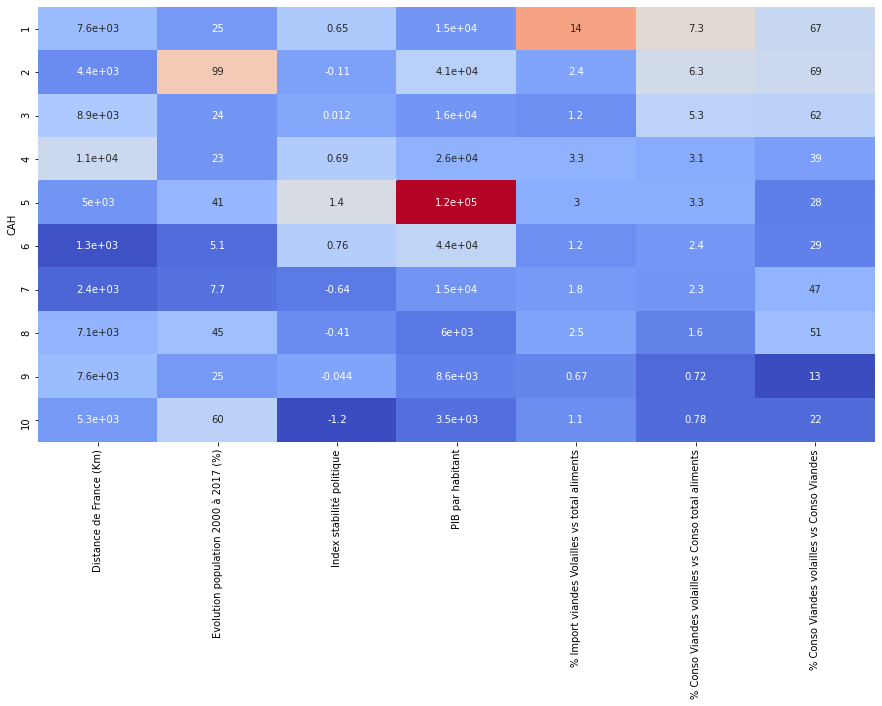

In [65]:
plt.figure(figsize = (15,8))
sns.heatmap(df_cah_gb_c_r, cmap=cmap,annot=df_cah_gb,annot_kws={'size':10},cbar=None)
plt.savefig('heatmap_cah.png')

## Algorithme du K-means

In [36]:
df_kmeans = df
df_kmeans.drop(['CAH'],axis=1,inplace=True)
df_kmeans

Distance de France (Km)  \
Zone                                            
États-Unis                             6166.0   
Chine                                  8216.0   
Brésil                                 8602.0   
Russie                                 2486.0   
Mexique                                9086.0   
...                                       ...   
Dominique                              6822.0   
Kiribati                              14362.0   
Sao Tomé-et-Principe                   5340.0   
Laos                                   9237.0   
Ouzbékistan                            5147.0   

                      Evolution population 2000 à 2017 (%)  \
Zone                                                         
États-Unis                                           15.40   
Chine                                                10.11   
Brésil                                               18.90   
Russie                                               -0.60   
Mexique                                              26.17   
...                                                    ...   
Dominique                                             2.60   
Kiribati                                             35.26   
Sao Tomé-et-Principe                                 45.57   
Laos                                                 30.61   
Ouzbékistan                                          29.03   

                      Index stabilité politique  PIB par habitant  \
Zone                                                                
États-Unis                                 0.34           60109.7   
Chine                                      0.00           14621.2   
Brésil                                    -0.42           14524.6   
Russie                                    -0.64           25926.4   
Mexique                                   -0.72           19721.3   
...                                         ...               ...   
Dominique                                  1.20           11304.0   
Kiribati                                   0.88            2235.7   
Sao Tomé-et-Principe                       0.19            3952.9   
Laos                                       0.40            7257.8   
Ouzbékistan                               -0.24            6518.8   

                      % Import viandes Volailles vs total aliments  \
Zone                                                                 
États-Unis                                                    0.15   
Chine                                                         0.22   
Brésil                                                        0.02   
Russie                                                        0.94   
Mexique                                                       2.18   
...                                                            ...   
Dominique                                                    15.38   
Kiribati                                                      3.45   
Sao Tomé-et-Principe                                          4.65   
Laos                                                          0.00   
Ouzbékistan                                                   0.00   

                      % Conso Viandes volailles vs Conso total aliments  \
Zone                                                                      
États-Unis                                                         5.62   
Chine                                                              1.27   
Brésil                                                             6.23   
Russie                                                             3.49   
Mexique                                                            4.37   
...                                                                 ...   
Dominique                                                          4.35   
Kiribati                                                           2.86   
Sao Tomé-et-Princi

In [37]:
# Données
X = df_kmeans.select_dtypes('number') 

In [38]:
# Etiquettes des échantillons
y = df_kmeans.index

In [39]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

### K value

In [40]:
kmeans_per_k = [KMeans(n_clusters=k).fit(X)
               for k in range(1,19)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\perso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



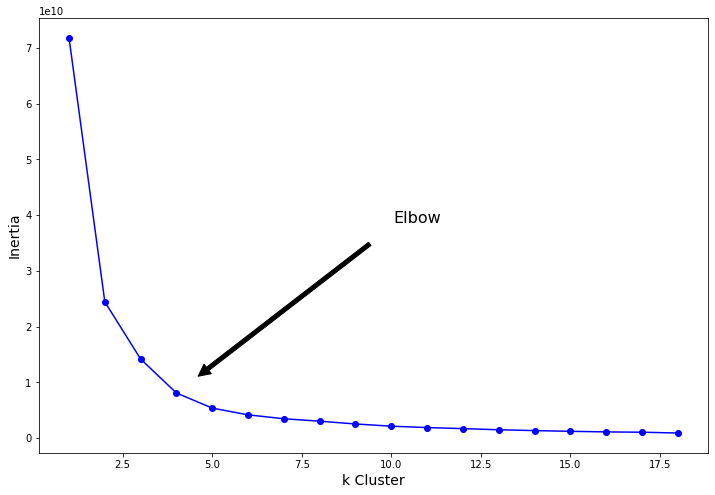

In [41]:
# plot inertia as a function of k and analyze the resulting curve.
plt.figure(figsize=(12,8))
plt.plot(range(1,19), inertias, 'bo-')
plt.xlabel('k Cluster', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.annotate('Elbow',
            xy=(4,inertias[3]), 
            xytext=(0.55, 0.55),
            textcoords="figure fraction",
            fontsize=16,
            arrowprops=dict(facecolor='black', shrink=0.1))

plt.show()

In [42]:
k = 11
kmeans = KMeans(n_clusters=k).fit(X)

In [43]:
silhouette_scores = [silhouette_score(X_scaled, model.labels_)
                    for model in kmeans_per_k[1:]]   # kmeans_per_k[0] is 1 cluster, not considered

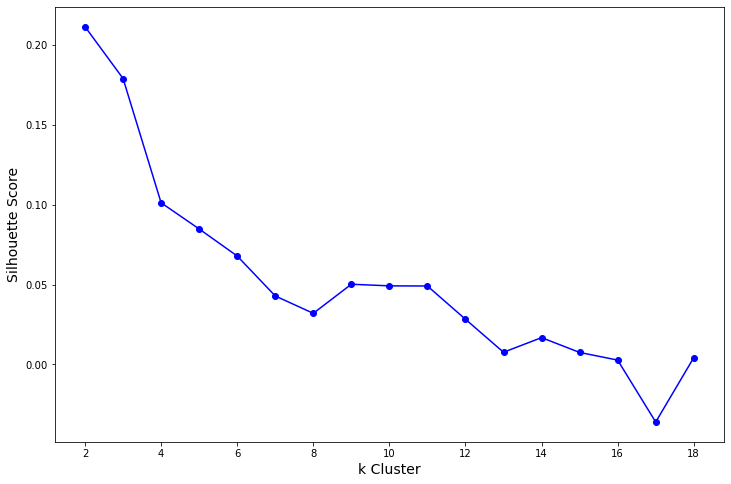

In [44]:
# plot the silhouette score as a function of k
plt.figure(figsize=(12,8))
plt.plot(range(2,19), silhouette_scores, 'bo-')
plt.xlabel('k Cluster', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.show()

In [45]:
df_kmeans['Kmeans'] = kmeans.labels_

In [46]:
df_kmeans.head()

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
Zone                                                                        
États-Unis                   6166.0                                 15.40   
Chine                        8216.0                                 10.11   
Brésil                       8602.0                                 18.90   
Russie                       2486.0                                 -0.60   
Mexique                      9086.0                                 26.17   

            Index stabilité politique  PIB par habitant  \
Zone                                                      
États-Unis                       0.34           60109.7   
Chine                            0.00           14621.2   
Brésil                          -0.42           14524.6   
Russie                          -0.64           25926.4   
Mexique                         -0.72           19721.3   

            % Import viandes Volailles vs total aliments  \
Zone                                                       
États-Unis                                          0.15   
Chine                                               0.22   
Brésil                                              0.02   
Russie                                              0.94   
Mexique                                             2.18   

            % Conso Viandes volailles vs Conso total aliments  \
Zone                                                            
États-Unis                                               5.62   
Chine                                                    1.27   
Brésil                                                   6.23   
Russie                                                   3.49   
Mexique                                                  4.37   

            % Conso Viandes volailles vs Conso Viandes  Kmeans  
Zone                                                            
États-Unis                                       44.86       1  
Chine                                            20.58       5  
Brésil                                           48.11       5  
Russie                                           40.44       6  
Mexique                                          50.14       0

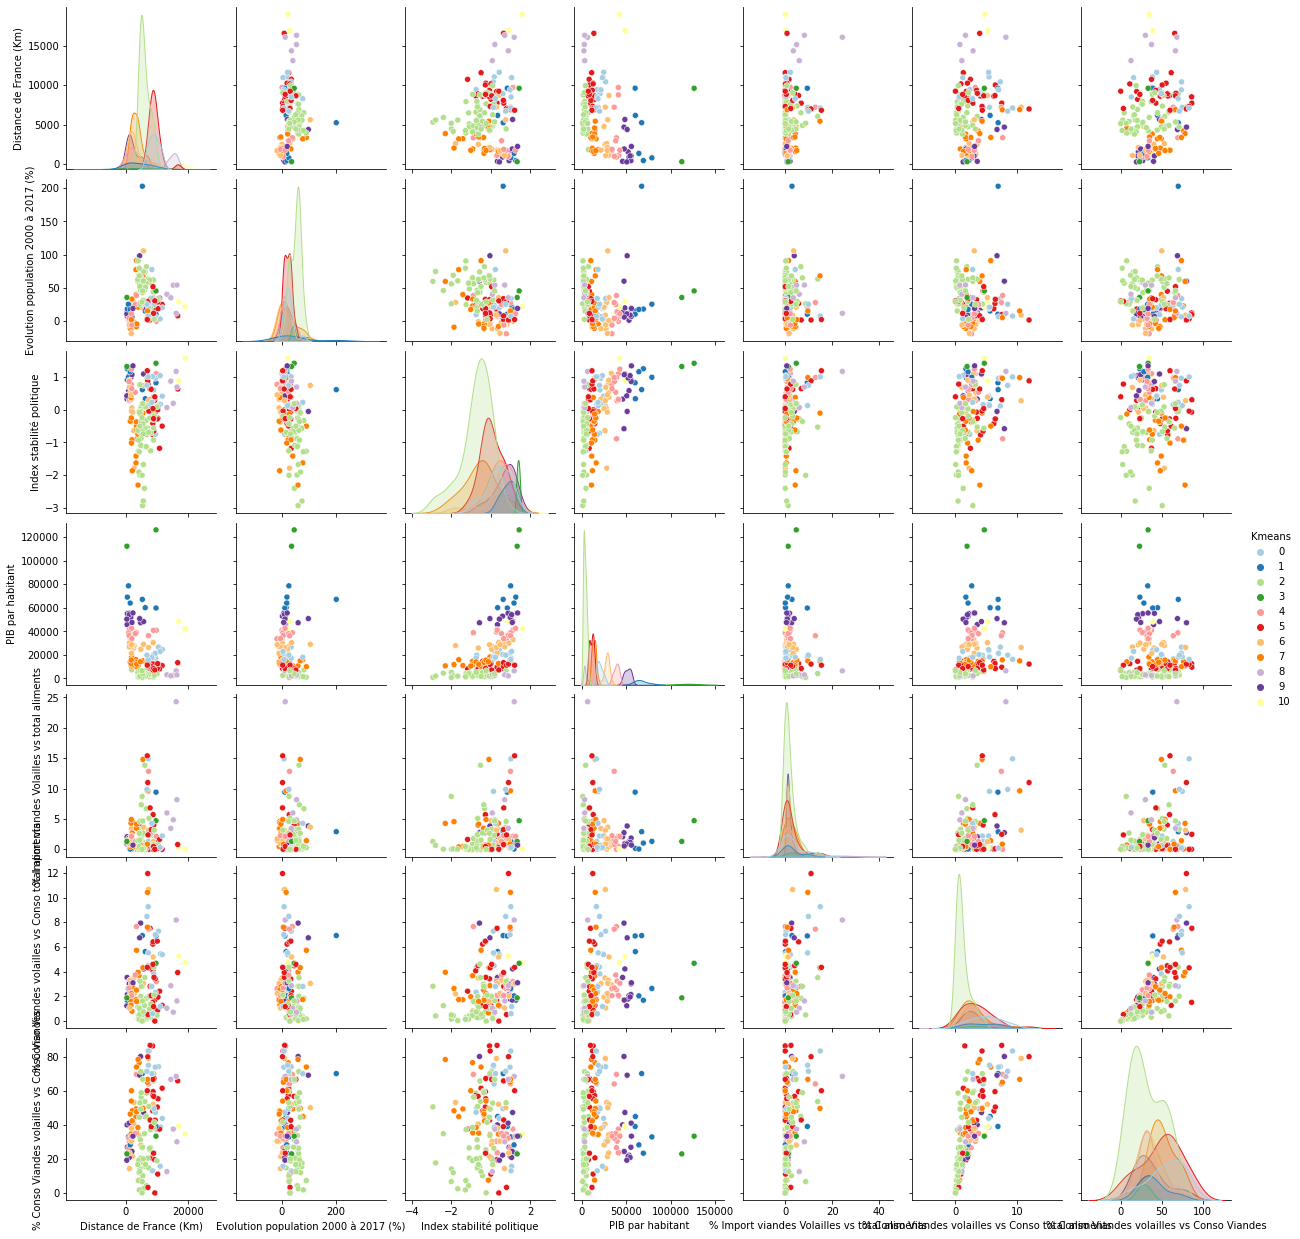

In [47]:
sns.pairplot(df_kmeans, kind="scatter", hue = 'Kmeans', palette = "Paired")

### Centroides

In [48]:
# les moyennes des groupes Kmeans par feature
df_kmeans_gb = df_kmeans.groupby(["Kmeans"]).mean()
df_kmeans_gb

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
Kmeans                                                                  
0                   8993.285714                             23.953571   
1                   3930.666667                             48.405000   
2                   5862.729167                             50.005000   
3                   4952.500000                             40.635000   
4                   3440.250000                              9.631667   
5                   9074.600000                             20.942000   
6                   3001.666667                              9.534000   
7                   3318.650000                             21.761500   
8                  15010.200000                             39.260000   
9                   2030.750000                             22.079167   
10                 17956.000000                             25.650000   

        Index stabilité politique  PIB par habitant  \
Kmeans                                                
0                        0.369286      20216.771429   
1                        0.870000      66492.083333   
2                       -0.733333       3436.560417   
3                        1.380000     119246.000000   
4                        0.600833      38484.175000   
5                        0.031600      10727.872000   
6                        0.257333      27989.760000   
7                       -0.560000      13417.670000   
8                        0.606000       3521.540000   
9                        0.672500      51282.558333   
10                       1.240000      45383.950000   

        % Import viandes Volailles vs total aliments  \
Kmeans                                                 
0                                           3.307857   
1                                           2.466667   
2                                           1.784375   
3                                           2.995000   
4                                           2.155833   
5                                           2.294000   
6                                           1.772667   
7                                           2.925000   
8                                           9.344000   
9                                           1.497500   
10                                          0.145000   

        % Conso Viandes volailles vs Conso total aliments  \
Kmeans                                                      
0                                                4.851429   
1                                                4.300000   
2                                                1.145417   
3                                                3.280000   
4                                                3.526667   
5                                                3.554400   
6                                                3.194000   
7                                                3.092000   
8                                                2.886000   
9                                                3.284167   
10                                               4.990000   

        % Conso Viandes volailles vs Conso Viandes  
Kmeans                                              
0                                        54.971429  
1                                        39.730000  
2                                        31.841667  
3                                        28.125000  
4                                        36.934167  
5                                        48.966800  
6                                        37.246667  
7                                        49.381000  
8                                        43.018000  
9                                        37.134167  
10                                       36.890000

In [49]:
#les pays par Cluster
for i in range(0,11):
    print("Groupe {}:".format(i))
    print(", ".join(df_kmeans[df_kmeans['Kmeans']==i].index.get_level_values('Zone').sort_values()))

Groupe 0:
Antigua-et-Barbuda, Argentine, Botswana, Chili, Costa Rica, Grenade, Malaisie, Maldives, Maurice, Mexique, République dominicaine, Suriname, Thaïlande, Uruguay
Groupe 1:
Hong Kong, Irlande, Norvège, Suisse, Émirats arabes unis, États-Unis
Groupe 2:
Afghanistan, Angola, Bangladesh, Burkina Faso, Bénin, Cambodge, Cameroun, Cap-Vert, Côte d'Ivoire, Djibouti, Gambie, Ghana, Guinée, Guinée-Bissau, Haïti, Honduras, Inde, Kenya, Kirghizistan, Lesotho, Liberia, Madagascar, Malawi, Mali, Maroc, Mauritanie, Mozambique, Nicaragua, Niger, Nigeria, Népal, Ouganda, Ouzbékistan, Pakistan, Rwanda, République centrafricaine, République du Congo, Sao Tomé-et-Principe, Sierra Leone, Sénégal, Tadjikistan, Tanzanie, Tchad, Togo, Yémen, Zambie, Zimbabwe, Éthiopie
Groupe 3:
Luxembourg, Macao
Groupe 4:
Bahamas, Chypre, Corée du Nord, Espagne, Estonie, Israël, Italie, Japon, Lituanie, Malte, Slovénie, Tchéquie
Groupe 5:
Afrique du Sud, Belize, Bolivie, Brésil, Chine, Colombie, Cuba, Dominique, Eswati

### Visualisation cluster 

In [50]:
df_kmeans

Distance de France (Km)  \
Zone                                            
États-Unis                             6166.0   
Chine                                  8216.0   
Brésil                                 8602.0   
Russie                                 2486.0   
Mexique                                9086.0   
...                                       ...   
Dominique                              6822.0   
Kiribati                              14362.0   
Sao Tomé-et-Principe                   5340.0   
Laos                                   9237.0   
Ouzbékistan                            5147.0   

                      Evolution population 2000 à 2017 (%)  \
Zone                                                         
États-Unis                                           15.40   
Chine                                                10.11   
Brésil                                               18.90   
Russie                                               -0.60   
Mexique                                              26.17   
...                                                    ...   
Dominique                                             2.60   
Kiribati                                             35.26   
Sao Tomé-et-Principe                                 45.57   
Laos                                                 30.61   
Ouzbékistan                                          29.03   

                      Index stabilité politique  PIB par habitant  \
Zone                                                                
États-Unis                                 0.34           60109.7   
Chine                                      0.00           14621.2   
Brésil                                    -0.42           14524.6   
Russie                                    -0.64           25926.4   
Mexique                                   -0.72           19721.3   
...                                         ...               ...   
Dominique                                  1.20           11304.0   
Kiribati                                   0.88            2235.7   
Sao Tomé-et-Principe                       0.19            3952.9   
Laos                                       0.40            7257.8   
Ouzbékistan                               -0.24            6518.8   

                      % Import viandes Volailles vs total aliments  \
Zone                                                                 
États-Unis                                                    0.15   
Chine                                                         0.22   
Brésil                                                        0.02   
Russie                                                        0.94   
Mexique                                                       2.18   
...                                                            ...   
Dominique                                                    15.38   
Kiribati                                                      3.45   
Sao Tomé-et-Principe                                          4.65   
Laos                                                          0.00   
Ouzbékistan                                                   0.00   

                      % Conso Viandes volailles vs Conso total aliments  \
Zone                                                                      
États-Unis                                                         5.62   
Chine                                                              1.27   
Brésil                                                             6.23   
Russie                                                             3.49   
Mexique                                                            4.37   
...                                                                 ...   
Dominique                                                          4.35   
Kiribati                                                           2.86   
Sao Tomé-et-Princi

In [51]:
df_kmeans_iso = pd.merge(df_iso_pays, df_kmeans, on="Zone")

In [52]:
df_kmeans_iso = df_kmeans_iso.sort_values(by='Kmeans', ascending=True)

In [53]:
df_kmeans_iso['Kmeans'] = df_kmeans_iso['Kmeans'].astype(object)

In [54]:
colors=["Maroon", "red", "salmon","yellow","Olive", "green","Lime", "orange", "blue", "orchid"]

fig = px.choropleth(
    df_kmeans_iso, 
    locations=df_kmeans_iso['Code ISO'], 
    color=df_kmeans_iso['Kmeans'],
    hover_name = df_kmeans_iso["Zone"],
    color_discrete_sequence=colors,
    labels={'Kmeans':'Clusters'})

fig.update_layout(
    title_text='Les Cluster avec Kmeans', title_x=0.5,
    font=dict(size=10))
fig.show()

### Heatmap

In [55]:
df_kmeans=df_kmeans.reset_index("Zone")
df_kmeans=df_kmeans.set_index('Kmeans')
df_kmeans=df_kmeans.drop(['Zone'],axis=1)
df_kmeans

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
Kmeans                                                                  
1                        6166.0                                 15.40   
5                        8216.0                                 10.11   
5                        8602.0                                 18.90   
6                        2486.0                                 -0.60   
0                        9086.0                                 26.17   
...                         ...                                   ...   
5                        6822.0                                  2.60   
8                       14362.0                                 35.26   
2                        5340.0                                 45.57   
5                        9237.0                                 30.61   
2                        5147.0                                 29.03   

        Index stabilité politique  PIB par habitant  \
Kmeans                                                
1                            0.34           60109.7   
5                            0.00           14621.2   
5                           -0.42           14524.6   
6                           -0.64           25926.4   
0                           -0.72           19721.3   
...                           ...               ...   
5                            1.20           11304.0   
8                            0.88            2235.7   
2                            0.19            3952.9   
5                            0.40            7257.8   
2                           -0.24            6518.8   

        % Import viandes Volailles vs total aliments  \
Kmeans                                                 
1                                               0.15   
5                                               0.22   
5                                               0.02   
6                                               0.94   
0                                               2.18   
...                                              ...   
5                                              15.38   
8                                               3.45   
2                                               4.65   
5                                               0.00   
2                                               0.00   

        % Conso Viandes volailles vs Conso total aliments  \
Kmeans                                                      
1                                                    5.62   
5                                                    1.27   
5                                                    6.23   
6                                                    3.49   
0                                                    4.37   
...                                                   ...   
5                                                    4.35   
8                                                    2.86   
2                                                    1.63   
5                                                    0.00   
2                                                    0.00   

        % Conso Viandes volailles vs Conso Viandes  
Kmeans                                              
1                                            44.86  
5                                            20.58  
5                                            48.11  
6                                            40.44  
0                                            50.14  
...                                            ...  
5                                            60.00  
8                                            66.67  
2                                            66.67  
5                                             0.00  
2                                             0.00  

[161 rows x 7 columns]

In [56]:
# Centrage et réduction des données
std_scale = preprocessing.StandardScaler().fit(df_kmeans)
df_scaled_kmeans = std_scale.transform(X)

In [57]:
#On crée un dataframe de nos données centrées réduites car on s'en servira pour afficher la heatmap des centroïds
df_kmeans_c_r = pd.DataFrame(df_scaled_kmeans, index=df_kmeans.index, columns=df_kmeans.columns)
df_kmeans_gb_c_r = df_kmeans_c_r.groupby(["Kmeans"]).mean()
df_kmeans_gb_c_r

Distance de France (Km)  Evolution population 2000 à 2017 (%)  \
Kmeans                                                                  
0                      0.808981                             -0.208312   
1                     -0.530594                              0.627897   
2                     -0.019368                              0.682615   
3                     -0.260215                              0.362172   
4                     -0.660359                             -0.698103   
5                      0.830497                             -0.311304   
6                     -0.776408                             -0.701443   
7                     -0.692534                             -0.283278   
8                      2.401063                              0.315149   
9                     -1.033314                             -0.272414   
10                     3.180525                             -0.150296   

        Index stabilité politique  PIB par habitant  \
Kmeans                                                
0                        0.467918          0.008218   
1                        1.028703          2.235191   
2                       -0.766982         -0.799320   
3                        1.599888          4.773944   
4                        0.727244          0.887326   
5                        0.089720         -0.448430   
6                        0.342535          0.382289   
7                       -0.572854         -0.318985   
8                        0.733031         -0.795231   
9                        0.807509          1.503242   
10                       1.443092          1.219374   

        % Import viandes Volailles vs total aliments  \
Kmeans                                                 
0                                           0.252861   
1                                           0.019144   
2                                          -0.170425   
3                                           0.165937   
4                                          -0.067218   
5                                          -0.028830   
6                                          -0.173678   
7                                           0.146488   
8                                           1.929951   
9                                          -0.250131   
10                                         -0.625911   

        % Conso Viandes volailles vs Conso total aliments  \
Kmeans                                                      
0                                                0.839881   
1                                                0.607643   
2                                               -0.720931   
3                                                0.178063   
4                                                0.281948   
5                                                0.293628   
6                                                0.141843   
7                                                0.098885   
8                                                0.012127   
9                                                0.179818   
10                                               0.898241   

        % Conso Viandes volailles vs Conso Viandes  
Kmeans                                              
0                                         0.681183  
1                                        -0.042553  
2                                        -0.417129  
3                                        -0.593615  
4                                        -0.175313  
5                                         0.396054  
6                                        -0.160474  
7                                         0.415722  
8                                         0.113577  
9                                        -0.165816  
10                                       -0.177410

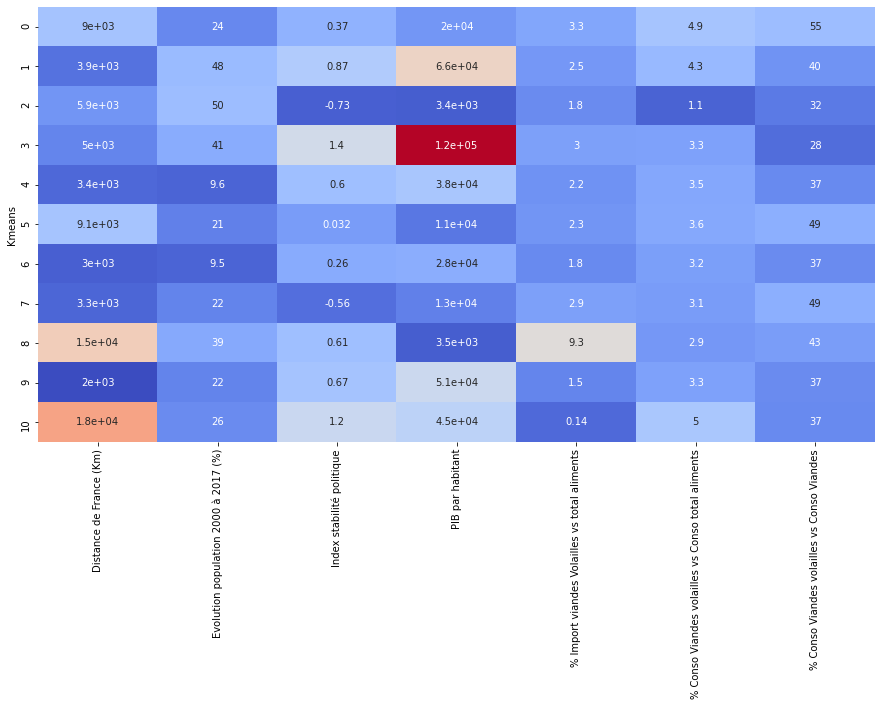

In [66]:
plt.figure(figsize = (15,8))
sns.heatmap(df_kmeans_gb_c_r, cmap=cmap,annot=df_kmeans_gb,annot_kws={'size':10},cbar=None)
plt.savefig('heatmap_Kmeans.png')

## Analyse en Composante Principale (ACP)

l'ACP est une méthode statistique qui permet de représenter les données en 2 dimensions dans un graphique facilement interprétables.

In [59]:
# Initialize
model = pca(n_components=7, normalize=True)

In [60]:
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


[pca] >Plot PC1 vs PC2 with loadings.


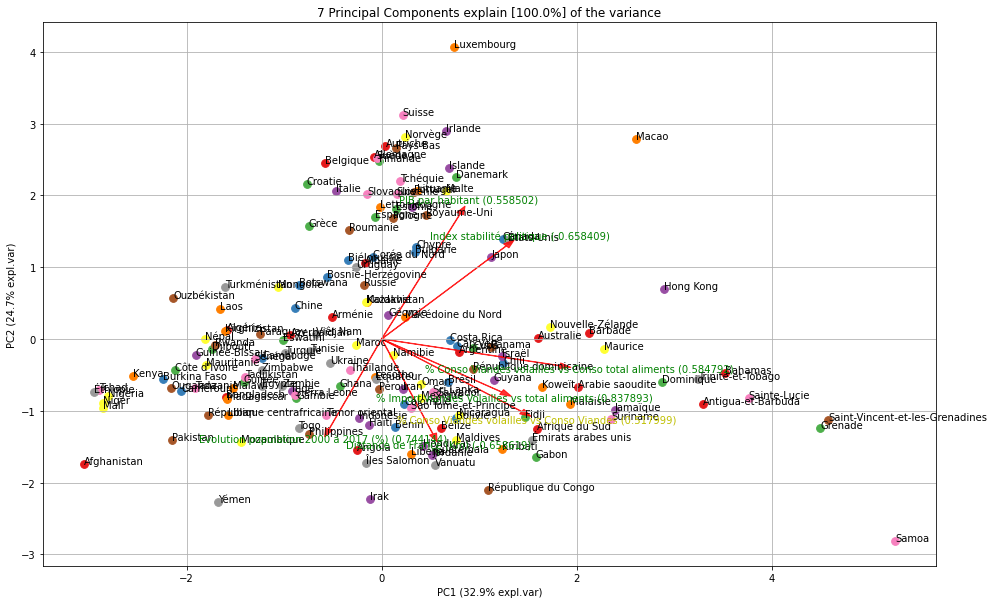

In [61]:
# Make plot with only the directions (no scatter)
fig, ax = model.biplot(label=True, legend=False, figsize=(16,10))

[pca] >Plot PC1 vs PC2 with loadings.


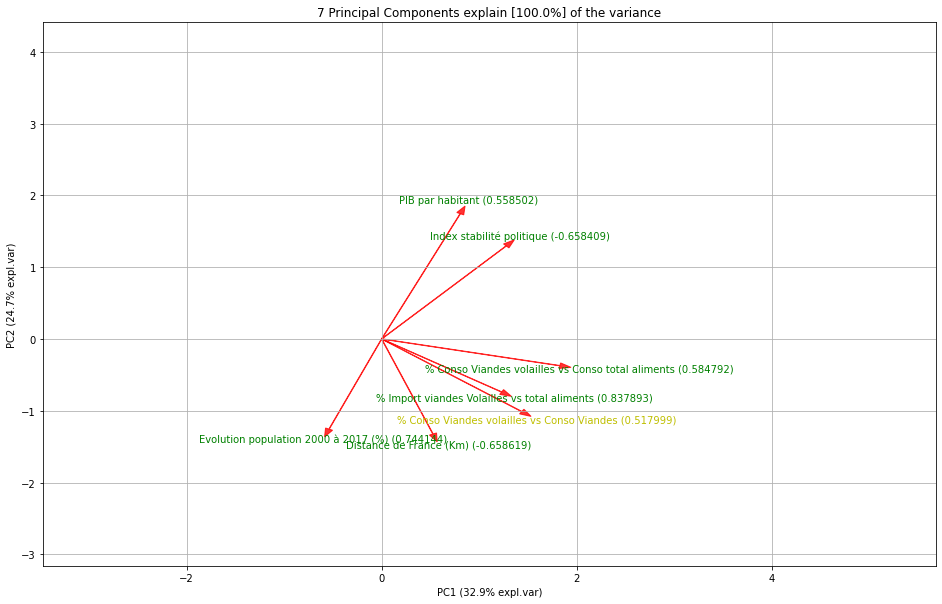

In [62]:
# Make plot with only the directions (no scatter)
fig, ax = model.biplot(cmap=None, label=False, legend=False, figsize=(16,10))

### Diagramme éboulis des valeurs propres
Les pourcentages d’inertie nous donnent une information sur la « structure » de nos données.

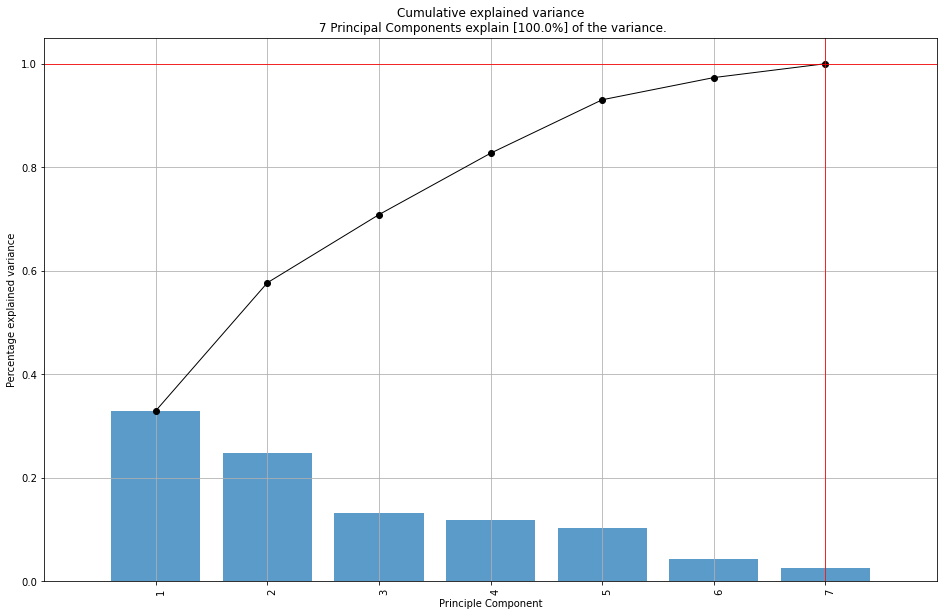

<Figure size 432x288 with 0 Axes>

In [63]:
# Scree plot
fig, ax = model.plot(figsize=(16,10))

[pca] >Plot PC1 vs PC2 with loadings.


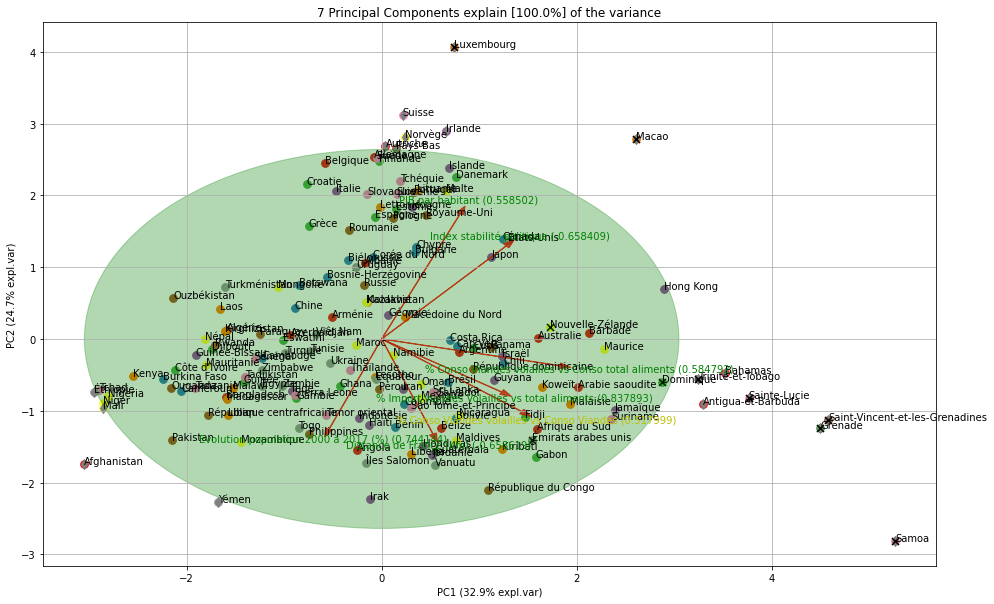

In [64]:
# Outlier detection
fig, ax = model.biplot(SPE=True, hotellingt2=True, legend=False,figsize=(16,10))